# Churn Modelling Data (P3- Churn-Modelling Data.xlsx)

## 1.  Customer Demographics: 
   - What is the distribution of customers across different age groups?
   - Analyze the gender distribution of customers.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load the data
file_path = 'P3- Churn-Modelling Data.xlsx'
data = pd.read_excel(file_path)

data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


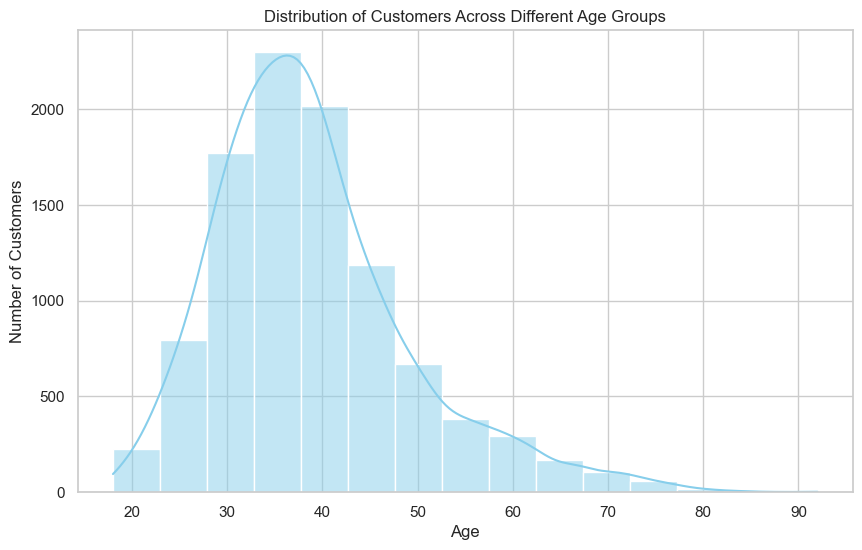

In [8]:
# Set the style for the plots
sns.set(style="whitegrid")

# Distribution of customers across different age groups
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Customers Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

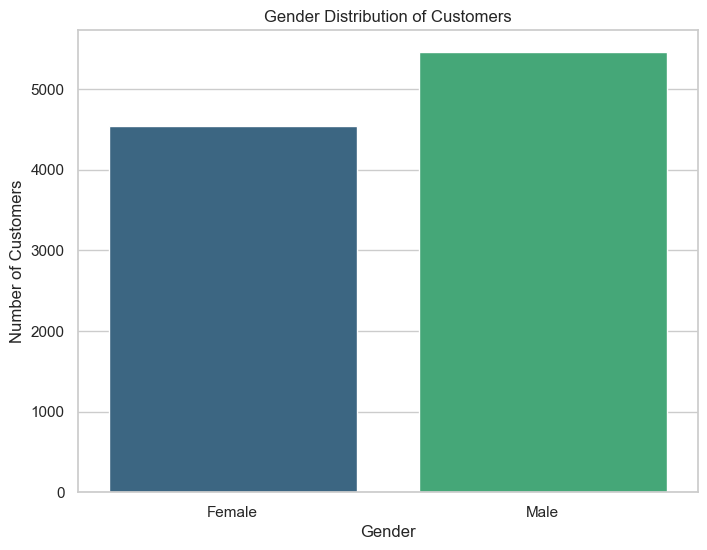

In [9]:
# Gender distribution of customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

## 2.  Churn Analysis: 
   - What percentage of customers have churned?
   - What are the main reasons for customer churn?
   - Identify any patterns or trends among customers who have churned.


In [10]:
# Calculate the churn rate
churn_rate = data['churned'].mean() * 100
print(f"Percentage of customers who have churned: {churn_rate:.2f}%")

Percentage of customers who have churned: 20.37%


In [11]:
# Encode categorical variables
data['Geography'] = LabelEncoder().fit_transform(data['Geography'])
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Exclude non-numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
correlation = numeric_data.corr()
churn_correlation = correlation['churned'].sort_values(ascending=False)
churn_correlation

NameError: name 'np' is not defined

In [ ]:
# Plot distribution of churned vs. non-churned customers
plt.figure(figsize=(8, 6))
sns.countplot(x='churned', data=data)
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()

# Plot feature distributions for churned and non-churned customers
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data, x=feature, hue='churned', multiple='stack', bins=30)
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()


## 3.  Product Usage: 
   - What are the most commonly used products or services?
   - Analyze the usage patterns of different customer segments.


In [ ]:
# Most commonly used products or services

# Distribution of the number of products
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', data=data)
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

In [ ]:
# Analyze usage patterns of different customer segments

# Distribution of number of products by geography
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Geography', data=data)
plt.title('Distribution of Number of Products by Geography')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Geography')
plt.show()

# Distribution of number of products by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Gender', data=data)
plt.title('Distribution of Number of Products by Gender')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Distribution of number of products by age group
data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
plt.figure(figsize=(12, 8))
sns.countplot(x='NumOfProducts', hue='AgeGroup', data=data)
plt.title('Distribution of Number of Products by Age Group')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

## 4.  Financial Analysis: 
   - What is the average account balance of customers?
   - Compare the financial characteristics of churned vs. non-churned customers.


In [ ]:
# Calculate the average account balance
average_balance = data['Balance'].mean()
print(f'Average Account Balance: {average_balance:.2f}')

In [ ]:
# Compare financial characteristics
churned = data[data['churned'] == 1]
not_churned = data[data['churned'] == 0]

# Summary statistics
financial_features = ['CreditScore', 'Balance', 'EstimatedSalary']
churned_summary = churned[financial_features].describe().T
not_churned_summary = not_churned[financial_features].describe().T

print('Churned Customers Financial Summary:')
print(churned_summary)

print('\nNon-Churned Customers Financial Summary:')
print(not_churned_summary)

# Visualize the financial characteristics
plt.figure(figsize=(12, 6))
for i, feature in enumerate(financial_features, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(churned[feature], label='Churned', shade=True)
    sns.kdeplot(not_churned[feature], label='Not Churned', shade=True)
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()

## 5.  Predictive Modeling: 
   - Which factors are the most significant predictors of customer churn?
   - Develop a predictive model to identify at-risk customers.


In [ ]:
# Convert Age column from string to numeric, coerce errors to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Optionally, handle NaN values (e.g., replace with mean or drop)
data['Age'].fillna(data['Age'].mean(), inplace=True)



In [15]:
data.Age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [12]:
# Split the data into features and target variable
X = data.drop('churned', axis=1)
y = data['churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the predictive model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred_prob))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Identify significant predictors
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

ValueError: could not convert string to float: "P'an"

In [13]:
data['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [141]:
data.Age = data.Age.astype(float)

In [142]:
# Optionally, handle NaN values (e.g., replace with mean or drop)
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [143]:
# Split the data into features and target variable
X = data.drop('churned', axis=1)
y = data['churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the predictive model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred_prob))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Identify significant predictors
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

ValueError: could not convert string to float: '31-40'